In [2]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Configurar parámetros
img_size = (224, 224)  # Tamaño de imagen para VGG19
batch_size = 32
num_classes = 3  # Cambia esto según el número de clases en tu conjunto de datos
learning_rate = 0.0001
epochs = 50  # Ajusta según sea necesario

# Cargar el modelo VGG19 preentrenado en ImageNet, sin la capa superior
base_model = VGG19(weights='imagenet', include_top=False, input_shape=img_size + (3,))

# Congelar las capas del modelo base para no entrenarlas
for layer in base_model.layers:
    layer.trainable = False

# Crear un modelo secuencial y añadir capas adicionales
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Capa de salida con el número correcto de clases
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Generadores de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'  # Cambia esta ruta según tus datos de entrenamiento
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'      # Cambia esta ruta según tus datos de validación

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

# Guardar el modelo entrenado
model.save('C:/Users/yeiko/Capstone/Modelos/modelo_vgg19_entrenado.h5')


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Found 2274 images belonging to 3 classes.
Found 229 images belonging to 3 classes.
Epoch 1/50


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 322s 4s/step - accuracy: 0.4781 - loss: 1.1787 - val_accuracy: 0.7679 - val_loss: 0.6955
Epoch 2/50
 1/71 ━━━━━━━━━━━━━━━━━━━━ 4:18 4s/step - accuracy: 0.7812 - loss: 0.6844

C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7812 - loss: 0.6844 - val_accuracy: 0.8000 - val_loss: 0.7175
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 348s 5s/step - accuracy: 0.6577 - loss: 0.7951 - val_accuracy: 0.8036 - val_loss: 0.6458
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7188 - loss: 0.7109 - val_accuracy: 0.8000 - val_loss: 0.5820
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 327s 5s/step - accuracy: 0.7192 - loss: 0.6994 - val_accuracy: 0.8438 - val_loss: 0.4917
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8438 - loss: 0.6125 - val_accuracy: 0.8000 - val_loss: 0.4150
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 325s 5s/step - accuracy: 0.7537 - loss: 0.6223 - val_accuracy: 0.8750 - val_loss: 0.4719
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7812 - loss: 0.5329 - val_accuracy: 1.0000 - val_loss: 0.5054
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 345s 5s/step - accuracy: 0.7757 - loss: 0.5821 - val_accuracy: 0.8795 - val_loss: 0.38

Found 141 images belonging to 3 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.5502 - loss: 0.7951
Precisión en el conjunto de prueba: 0.71
Pérdida en el conjunto de prueba: 0.59
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step
Reporte de Clasificación:
              precision    recall  f1-score   support

      Bengin       0.42      0.13      0.20        39
   Malignant       0.83      0.90      0.87        72
      Normal       0.59      1.00      0.74        30

    accuracy                           0.71       141
   macro avg       0.61      0.68      0.60       141
weighted avg       0.67      0.71      0.65       141



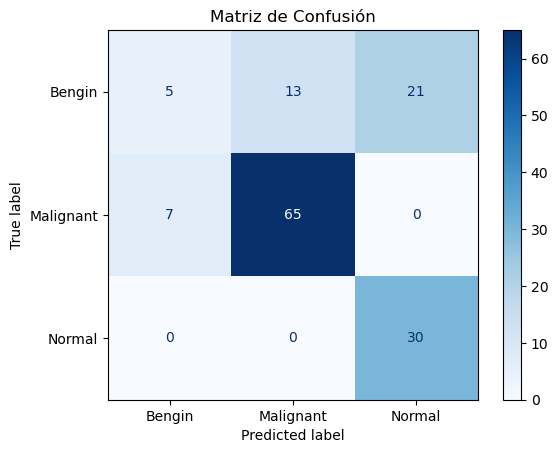

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Configuración de parámetros
img_size = (224, 224)
batch_size = 32

# Cargar el modelo VGG19 entrenado
model_path = 'C:/Users/yeiko/Capstone/Modelos/modelo_vgg19_v11.h5'  # Cambia esta ruta según la ubicación de tu modelo
model = load_model(model_path)

# Configuración del generador de datos de prueba
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_dir = 'C:/Users/yeiko/Capstone/Dataset/test'  # Cambia esta ruta según tus datos de prueba

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.2f}")

# Obtener predicciones
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


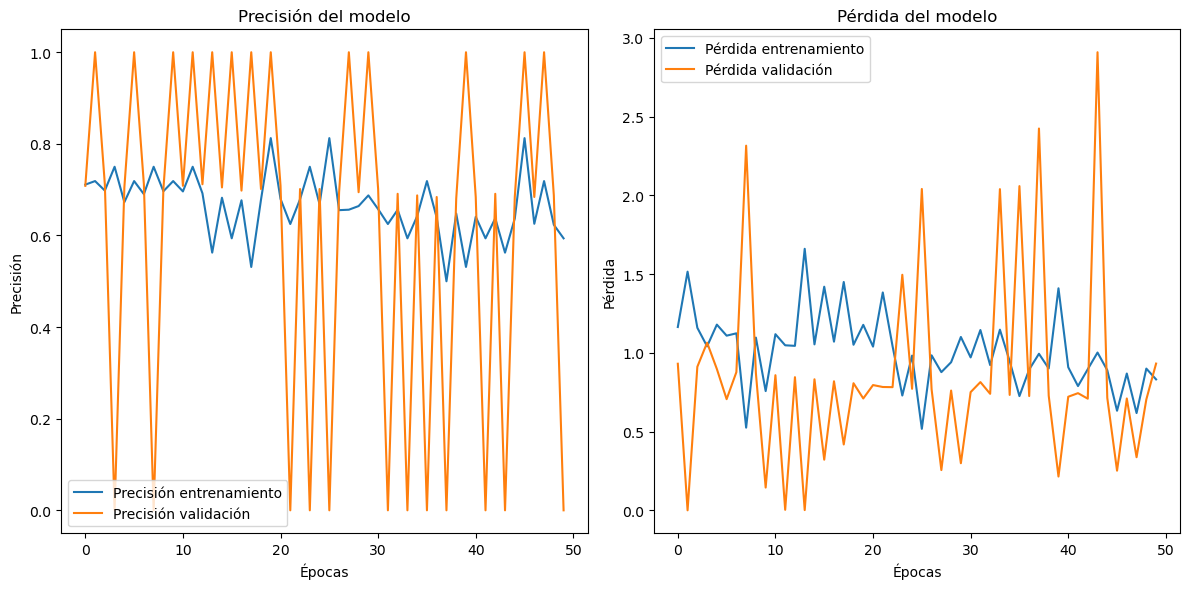

In [10]:
import matplotlib.pyplot as plt

# Suponiendo que `history` es el historial del entrenamiento del modelo
# Si ya tienes el historial, puedes cargarlo directamente o usar la variable `history`
# Ejemplo: history = model.fit(...)

# Graficar precisión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subgráfico para la precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)  # Subgráfico para la pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración de parámetros
img_size = (224, 224)
batch_size = 32
retrain_epochs = 30  # Ajusta según sea necesario
learning_rate = 1e-5  # Tasa de aprendizaje reducida

# Cargar el modelo previamente entrenado
model_path = 'C:/Users/yeiko/Capstone/Modelos/modelo_vgg19_v2.h5'  # Cambia esta ruta según la ubicación de tu modelo
model = load_model(model_path)

# Congelar capas excepto las últimas para aprovechar el aprendizaje previo
for layer in model.layers[:-4]:  # Ajusta el número de capas a congelar según sea necesario
    layer.trainable = False

# Compilar el modelo con la nueva tasa de aprendizaje
model.compile(optimizer=Adam(learning_rate=learning_rate), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Configuración del generador de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'  # Cambia esta ruta según tus datos de entrenamiento
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'      # Cambia esta ruta según tus datos de validación

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Reentrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=retrain_epochs
)

# Guardar el modelo reentrenado
model.save('C:/Users/yeiko/Capstone/Modelos/modelo_vgg19_v3.h5')


Found 2274 images belonging to 3 classes.
Found 229 images belonging to 3 classes.
Epoch 1/30


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 293s 4s/step - accuracy: 0.8627 - loss: 0.3373 - val_accuracy: 0.9018 - val_loss: 0.2387
Epoch 2/30
 1/71 ━━━━━━━━━━━━━━━━━━━━ 4:15 4s/step - accuracy: 0.7812 - loss: 0.5090

C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7812 - loss: 0.5090 - val_accuracy: 1.0000 - val_loss: 0.1173
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 302s 4s/step - accuracy: 0.8450 - loss: 0.3637 - val_accuracy: 0.9018 - val_loss: 0.2377
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8750 - loss: 0.3430 - val_accuracy: 1.0000 - val_loss: 0.1511
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 299s 4s/step - accuracy: 0.8610 - loss: 0.3387 - val_accuracy: 0.9018 - val_loss: 0.2398
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8750 - loss: 0.2812 - val_accuracy: 1.0000 - val_loss: 0.0698
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 305s 4s/step - accuracy: 0.8610 - loss: 0.3331 - val_accuracy: 0.9018 - val_loss: 0.2395
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9062 - loss: 0.2460 - val_accuracy: 1.0000 - val_loss: 0.0903
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - accuracy: 0.8735 - loss: 0.3165 - val_accuracy: 0.9018 - val_loss: 0.239

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Configuración de parámetros
img_size = (224, 224)
batch_size = 32
retrain_epochs = 50  # Ajusta según sea necesario
learning_rate = 1e-5  # Tasa de aprendizaje reducida

# Cargar el modelo previamente entrenado
model_path = 'C:/Users/yeiko/Capstone/Modelos/modelo_vgg19_v9.h5'
model = load_model(model_path)

# Congelar capas excepto las últimas para aprovechar el aprendizaje previo
for layer in model.layers[:-4]:  # Ajusta el número de capas a descongelar
    layer.trainable = False

# Compilar el modelo con la nueva tasa de aprendizaje
model.compile(optimizer=Adam(learning_rate=learning_rate), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Configuración del generador de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Calcular los pesos de clase para enfatizar la clase faltante
class_labels = train_generator.classes  # Etiquetas de clase en el conjunto de entrenamiento
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(class_labels), y=class_labels)
class_weights_dict = dict(enumerate(class_weights))

# Reentrenar el modelo con `class_weight`
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=retrain_epochs,
    class_weight=class_weights_dict  # Aplicar los pesos de clase
)

# Guardar el modelo reentrenado
model.save('C:/Users/yeiko/Capstone/Modelos/modelo_vgg19_v11.h5')


Found 2724 images belonging to 3 classes.
Found 289 images belonging to 3 classes.
Epoch 1/50


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 374s 4s/step - accuracy: 0.7113 - loss: 1.1328 - val_accuracy: 0.7083 - val_loss: 0.9309
Epoch 2/50
 1/85 ━━━━━━━━━━━━━━━━━━━━ 5:13 4s/step - accuracy: 0.7188 - loss: 1.5157

C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7188 - loss: 1.5157 - val_accuracy: 1.0000 - val_loss: 1.5985e-04
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.6950 - loss: 1.1455 - val_accuracy: 0.7118 - val_loss: 0.9114
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7500 - loss: 1.0413 - val_accuracy: 0.0000e+00 - val_loss: 1.0646
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 373s 4s/step - accuracy: 0.6696 - loss: 1.2712 - val_accuracy: 0.7049 - val_loss: 0.8976
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7188 - loss: 1.1092 - val_accuracy: 1.0000 - val_loss: 0.7059
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 357s 4s/step - accuracy: 0.7003 - loss: 1.1167 - val_accuracy: 0.7118 - val_loss: 0.8776
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7500 - loss: 0.5251 - val_accuracy: 0.0000e+00 - val_loss: 2.3155
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 362s 4s/step - accuracy: 0.6814 - loss: 1.1525 - val_accuracy: 0.7014 - val_